2.5 Norms

In [1]:
import numpy as np

In [2]:
def l_p_norm(vec, p=2):
    return np.power(np.power(vec, p).sum(), 1/p)

In [3]:
l_p_norm([1,2,3,4])

5.477225575051661

In [4]:
from numpy.linalg import norm

norm([1,2,3,4])

5.477225575051661

In [5]:
def l_1_norm(vec):
    return np.sum(np.absolute(vec))

In [6]:
l_1_norm([1,2,3,-4])

10

In [7]:
def max_norm(vec):
    return np.max(np.absolute(vec))

In [8]:
max_norm([1,2,3,-4])

4

In [9]:
def cos_similarity(x, y):
    return np.dot(x, y)/(l_p_norm(x) * l_p_norm(y, 2))

In [10]:
cos_similarity([1,2,3,-4], [1,2,3,-4])

1.0

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(np.array([1,2,3,-4]).reshape(1, -1), np.array([1,2,3,-4]).reshape(1, -1))

array([[1.]])

In [12]:
np.dot([0,2,4,1], [1,2,3,-4])/(norm([0,2,4,1])*norm([1,2,3,-4]))

0.4780914437337575

In [13]:
cos_similarity([0,2,4,1], [1,2,3,-4])

0.4780914437337575

In [14]:
from scipy import spatial
1-spatial.distance.cosine([0,2,4,1], [1,2,3,-4])

0.47809144373375756

In [15]:
def frobenius_norm(mat):
    return l_p_norm(mat, p=2)

In [16]:
c = np.array([[1,2,3],[4,5,6]])
c

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
frobenius_norm(c)

9.539392014169456

In [18]:
norm(c, 'fro')

9.539392014169456

2.7 Eigendecomposition

In [46]:
import matplotlib.pyplot as plt

def plot_2d_vecs(vecs, title=None, colors=None):
    origin = [0], [0] 

    plt.quiver(*origin, *[vecs[:,i] for i in range(vecs.shape[1])], angles='xy', color=colors, scale_units='xy',  scale=1)
    plt.title(title)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.show()

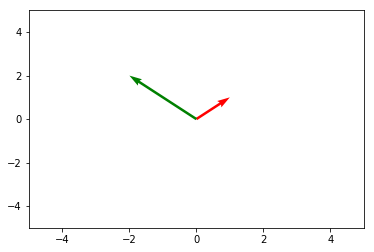

In [47]:
stacked_vecs = np.array([[1,1],[-2,2]])

plot_2d_vecs(stacked_vecs, colors=['r','g'])

In [78]:
A = np.random.rand(2, 2)*2
A

array([[0.27444971, 1.35462961],
       [1.73518049, 0.49720559]])

In [79]:
x = [2,3]

In [80]:
A@x

array([4.61278827, 4.96197775])

In [81]:
np.stack([A@x, x]).T

array([[4.61278827, 2.        ],
       [4.96197775, 3.        ]])

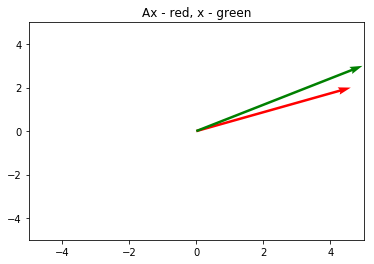

In [82]:
plot_2d_vecs(np.stack([A@x, x]).T, title='Ax - red, x - green', colors=['r','g'])

In [83]:
from numpy import linalg as LA

In [84]:
w, v = LA.eig(A)
w,v 

(array([-1.15135546,  1.92301076]), array([[-0.68878012, -0.63486659],
        [ 0.72497031, -0.77262178]]))

In [85]:
v[:,0]

array([-0.68878012,  0.72497031])

In [86]:
A@v[:,0]

array([ 0.79303075, -0.83469853])

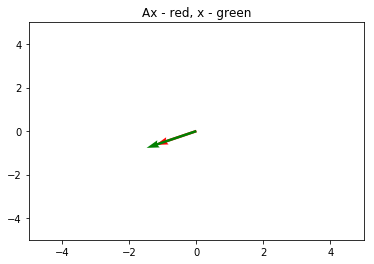

In [90]:
# As we can see the Av only scales the eigenvector v, but doesn't rotate
plot_2d_vecs(np.stack([A@(v[:,1]), v[:,1]]).T, title='Ax - red, x - green', colors=['r','g'])

In [94]:
eigvals, eigvecs = LA.eig(A)

lambda_mat = np.diag(eigvals)


eigvecs @ lambda_mat @ LA.inv(eigvecs)

array([[0.27444971, 1.35462961],
       [1.73518049, 0.49720559]])

In [95]:
A

array([[0.27444971, 1.35462961],
       [1.73518049, 0.49720559]])